In [1]:
import pandas as pd
import numpy as np
from random import shuffle

import gensim
from gensim.models.word2vec import Word2Vec
from tqdm import tqdm
tqdm.pandas(desc='progress-bar')

import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

C:\Users\Arindam Kumar\Anaconda3\envs\tf-gpu\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [2]:
def read():
    df = pd.read_csv('D:/Datasets/hackerearth/hm_train.csv')
    df.drop(['num_sentence'], axis=1, inplace=True)
    labels = df.predicted_category
    df.drop(['predicted_category'], axis=1, inplace=True)
    return df, labels

In [3]:
df, labels = read()
df.head()

,hmid,reflection_period,cleaned_hm
0,27673,24h,I went on a successful date with someone I fel...
1,27674,24h,I was happy when my son got 90% marks in his e...
2,27675,24h,I went to the gym this morning and did yoga.
3,27676,24h,We had a serious talk with some friends of our...
4,27677,24h,I went with grandchildren to butterfly display...


In [4]:
print(len(labels), len(df))

60321 60321


In [5]:
df.cleaned_hm = df.cleaned_hm.str.lower()

In [6]:
def remove_stopwords(sentence):
    # removing some known errors and differences between american and british english
    sentence = sentence.replace("'s", "").replace("n't", " not")
    sentence = sentence.replace("travelled", "traveled").replace("favourite", "favorite")
    sentence = sentence.replace("i'm", "i am").replace("i've", "i have")
    sentence = sentence.replace("colour", "color").replace("neighbour", "neighbor")
    sentence = sentence.replace("jewellery", "jewelry").replace("theatre", "theater")
    sentence = sentence.replace("i'd", "i would").replace("didnt", "did not")
    split = sentence.split(' ')
    if len(split) > 80:
        return ' '.join([w for w in sentence.split(' ') if w not in stopwords.words('english')])
    else:
        return sentence

In [7]:
df['cleaned_hm2'] = df.cleaned_hm.apply(remove_stopwords)

In [8]:
df.drop(['cleaned_hm'], axis=1, inplace=True)

In [9]:
df.head()

,hmid,reflection_period,cleaned_hm2
0,27673,24h,i went on a successful date with someone i fel...
1,27674,24h,i was happy when my son got 90% marks in his e...
2,27675,24h,i went to the gym this morning and did yoga.
3,27676,24h,we had a serious talk with some friends of our...
4,27677,24h,i went with grandchildren to butterfly display...


In [10]:
t = Tokenizer()
t.fit_on_texts(df.cleaned_hm2)
vocab_size = len(t.word_index) + 1

In [11]:
encoded_docs = t.texts_to_sequences(df.cleaned_hm2)

In [12]:
len(encoded_docs)

60321

In [13]:
lengths = []
for doc in encoded_docs:
    lengths.append(len(doc))

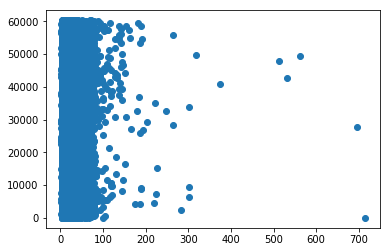

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(lengths, range(len(lengths)))
plt.show()

In [15]:
df['tokens'] = encoded_docs

In [16]:
df.head()

,hmid,reflection_period,cleaned_hm2,tokens
0,27673,24h,i went on a successful date with someone i fel...,"[1, 22, 16, 3, 765, 319, 12, 286, 1, 93, 12625..."
1,27674,24h,i was happy when my son got 90% marks in his e...,"[1, 7, 14, 21, 2, 64, 17, 2281, 1424, 10, 72, ..."
2,27675,24h,i went to the gym this morning and did yoga.,"[1, 22, 4, 6, 397, 35, 94, 5, 99, 930]"
3,27676,24h,we had a serious talk with some friends of our...,"[23, 18, 3, 1617, 317, 12, 47, 50, 11, 3807, 1..."
4,27677,24h,i went with grandchildren to butterfly display...,"[1, 22, 12, 1911, 4, 3808, 4209, 20, 12627, 12..."


In [17]:
df.drop(['cleaned_hm2'], axis=1, inplace=True)

In [18]:
df.head()

,hmid,reflection_period,tokens
0,27673,24h,"[1, 22, 16, 3, 765, 319, 12, 286, 1, 93, 12625..."
1,27674,24h,"[1, 7, 14, 21, 2, 64, 17, 2281, 1424, 10, 72, ..."
2,27675,24h,"[1, 22, 4, 6, 397, 35, 94, 5, 99, 930]"
3,27676,24h,"[23, 18, 3, 1617, 317, 12, 47, 50, 11, 3807, 1..."
4,27677,24h,"[1, 22, 12, 1911, 4, 3808, 4209, 20, 12627, 12..."


In [19]:
np.mean(lengths)

17.949602957510653

In [20]:
max_length = 80
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [21]:
paddocs = []
for doc in padded_docs:
    paddocs.append(list(doc))

In [22]:
df['tokens2'] = paddocs

In [23]:
lengths = []
for doc in paddocs:
    lengths.append(len(doc))

In [24]:
np.mean(lengths)

80.0

In [25]:
df.drop(['tokens'], axis=1, inplace=True)

In [26]:
df['tokens'] = df.tokens2

In [27]:
df.drop(['tokens2'], axis=1, inplace=True)

In [28]:
df.head()

,hmid,reflection_period,tokens
0,27673,24h,"[1, 22, 16, 3, 765, 319, 12, 286, 1, 93, 12625..."
1,27674,24h,"[1, 7, 14, 21, 2, 64, 17, 2281, 1424, 10, 72, ..."
2,27675,24h,"[1, 22, 4, 6, 397, 35, 94, 5, 99, 930, 0, 0, 0..."
3,27676,24h,"[23, 18, 3, 1617, 317, 12, 47, 50, 11, 3807, 1..."
4,27677,24h,"[1, 22, 12, 1911, 4, 3808, 4209, 20, 12627, 12..."


In [29]:
embeddings_index = gensim.models.KeyedVectors.load_word2vec_format('D:/Datasets/embeddings/Word2Vec/GoogleNews-vectors-negative300.bin', binary=True)

In [30]:
vocab_size

20879

In [31]:
embedding_matrix = np.zeros((vocab_size, 300))
count = 0
for word, i in t.word_index.items():
    try:
        embedding_vector = embeddings_index[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        print(f'Did not find {word}')
        count += 1
        pass
    
print(count)

Did not find a
Did not find to
Did not find and
Did not find of
Did not find 
Did not find 10
Did not find mturk
Did not find 24
Did not find 20
Did not find 100
Did not find i'd
Did not find 30
Did not find 15
Did not find 50
Did not find 12
Did not find 00
Did not find 2017
Did not find 25
Did not find didnt
Did not find 40
Did not find 11
Did not find 500
Did not find 13
Did not find 000
Did not find 200
Did not find i'll
Did not find donat
Did not find 14
Did not find 300
Did not find 60
Did not find travelling
Did not find judgements
Did not find 250
Did not find cancelled
Did not find 18
Did not find 80
Did not find 10th
Did not find 1000
Did not find 45
Did not find 16
Did not find 70
Did not find 17
Did not find 90
Did not find morty
Did not find theatre
Did not find ooty
Did not find 2000
Did not find ps4
Did not find a
Did not find 75
Did not find fianca
Did not find 30th
Did not find eudaimonia
Did not find jigarthanda
Did not find a3i
Did not find iave
Did not find 2016
Did

Did not find antony
Did not find iching
Did not find animels
Did not find beutifull
Did not find 'on
Did not find job'
Did not find cude
Did not find v60
Did not find kulu
Did not find 186
Did not find medel
Did not find verymuch
Did not find manytimes
Did not find apfc
Did not find 147
Did not find patrickas
Did not find nugs
Did not find pgcert
Did not find retreiver
Did not find laughlin
Did not find robinhood
Did not find ffa
Did not find salry
Did not find gramado
Did not find founders'
Did not find laurenta
Did not find grandsona
Did not find marthon
Did not find while
Did not find espcas9
Did not find cas9
Did not find bataan
Did not find gryo
Did not find you
Did not find pingami
Did not find placea
Did not find rainers
Did not find fanas
Did not find damodara
Did not find touche'
Did not find horton
Did not find whwn
Did not find sprung'
Did not find bibbi
Did not find 2a3
Did not find lotery
Did not find 84th
Did not find insatllation
Did not find 2200
Did not find petey
Did 

Did not find tesol
Did not find fudruckers
Did not find piyo
Did not find uji
Did not find usmc
Did not find osmonds
Did not find smari
Did not find conchords
Did not find foid
Did not find egift
Did not find itall
Did not find dayquil
Did not find petrolium
Did not find decresing
Did not find hailee
Did not find steinfeld
Did not find 87th
Did not find romio
Did not find nextflix
Did not find offiically
Did not find sdad
Did not find jigglers
Did not find gegard
Did not find mousasi
Did not find zenzi
Did not find foodworks
Did not find parx
Did not find hounddog
Did not find timehop
Did not find ao3
Did not find 'just
Did not find because'
Did not find 9gag
Did not find beverage'
Did not find honeybun
Did not find nationalised
Did not find bank
Did not find 100usd
Did not find zao
Did not find spermscope
Did not find carnegie
Did not find bugline
Did not find hoers
Did not find 18v
Did not find blacky
Did not find amiibo
Did not find 'food
Did not find face'
Did not find ronny
Did no

Did not find mushroomhead
Did not find aqes
Did not find events
Did not find coakers
Did not find sphaghetti
Did not find gaurdians
Did not find saturnz
Did not find barz
Did not find 'baby'
Did not find gettijg
Did not find appearance
Did not find albania
Did not find brockmire
Did not find budritas
Did not find 428i
Did not find picknick
Did not find liquidsky
Did not find jarrad
Did not find omegle
Did not find blush
Did not find 2reply
Did not find ciroc
Did not find 'overrule'
Did not find vallejo
Did not find seti
Did not find oubre
Did not find olynek
Did not find foyt
Did not find 1983
Did not find calistoga
Did not find ramsay
Did not find iworked
Did not find april'17
Did not find 205
Did not find hayes'
Did not find dooney
Did not find freeleech
Did not find deocrations
Did not find spikeball
Did not find 2600
Did not find 2020
Did not find momas
Did not find rpcied
Did not find finalised
Did not find jillian
Did not find 325
Did not find emmanuel
Did not find camgirl
Did no

In [32]:
embedding_matrix.shape

(20879, 300)

In [35]:
df['24h'] = df.reflection_period == '24h'
df['3m'] = df.reflection_period == '3m'

In [40]:
df.drop(['reflection_period'], axis=1, inplace=True)

In [41]:
df.head()

,hmid,tokens,24h,3m
0,27673,"[1, 22, 16, 3, 765, 319, 12, 286, 1, 93, 12625...",True,False
1,27674,"[1, 7, 14, 21, 2, 64, 17, 2281, 1424, 10, 72, ...",True,False
2,27675,"[1, 22, 4, 6, 397, 35, 94, 5, 99, 930, 0, 0, 0...",True,False
3,27676,"[23, 18, 3, 1617, 317, 12, 47, 50, 11, 3807, 1...",True,False
4,27677,"[1, 22, 12, 1911, 4, 3808, 4209, 20, 12627, 12...",True,False


In [42]:
df.shape

(60321, 4)

In [44]:
len(labels)

60321

In [46]:
labels_to_cats = {'achievement':      (1, 0, 0, 0, 0, 0, 0),
                  'affection':        (0, 1, 0, 0, 0, 0, 0),
                  'enjoy_the_moment': (0, 0, 1, 0, 0, 0, 0),
                  'nature':           (0, 0, 0, 1, 0, 0, 0),
                  'exercise':         (0, 0, 0, 0, 1, 0, 0),
                  'bonding':          (0, 0, 0, 0, 0, 1, 0),
                  'leisure':          (0, 0, 0, 0, 0, 0, 1)}

In [47]:
cats_to_labels = dict()
for k, v in labels_to_cats.items():
    cats_to_labels[v] = k

cats_to_labels

{(1, 0, 0, 0, 0, 0, 0): 'achievement',
 (0, 1, 0, 0, 0, 0, 0): 'affection',
 (0, 0, 1, 0, 0, 0, 0): 'enjoy_the_moment',
 (0, 0, 0, 1, 0, 0, 0): 'nature',
 (0, 0, 0, 0, 1, 0, 0): 'exercise',
 (0, 0, 0, 0, 0, 1, 0): 'bonding',
 (0, 0, 0, 0, 0, 0, 1): 'leisure'}

In [49]:
y = []
for label in labels:
    y.append(labels_to_cats[label])

y = np.array(y)

In [53]:
len(y)

60321

In [54]:
df.head()

,hmid,tokens,24h,3m
0,27673,"[1, 22, 16, 3, 765, 319, 12, 286, 1, 93, 12625...",True,False
1,27674,"[1, 7, 14, 21, 2, 64, 17, 2281, 1424, 10, 72, ...",True,False
2,27675,"[1, 22, 4, 6, 397, 35, 94, 5, 99, 930, 0, 0, 0...",True,False
3,27676,"[23, 18, 3, 1617, 317, 12, 47, 50, 11, 3807, 1...",True,False
4,27677,"[1, 22, 12, 1911, 4, 3808, 4209, 20, 12627, 12...",True,False


In [58]:
len(df.tokens[0])

80

In [65]:
from keras.layers import CuDNNLSTM, Bidirectional, Input
from keras.models import Model
from keras.optimizers import Adam

In [64]:
input_tensor = Input(shape=(80,), dtype='int32')
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=80, trainable=False)(input_tensor)
x = Bidirectional(CuDNNLSTM(256, return_sequences=True))(embedding_layer)
x = Bidirectional(CuDNNLSTM(64, return_sequences=False))(x)
x = Dense(64, activation='relu')(x)
x = Dense(7, activation='softmax')(x)
model = Model(input_tensor, x)

In [66]:
model.compile(optimizer=Adam(lr=1e-3, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 80, 300)           6263700   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 80, 512)           1142784   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               295936    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 455       
Total params: 7,711,131
Trainable params: 1,447,431
Non-trainable params: 6,263,700
__________________________________________________________

In [68]:
x_train, x_val, y_train, y_val = train_test_split(df, y, test_size=0.2)

In [72]:
print(x_train.shape, x_val.shape)

(48256, 4) (12065, 4)


In [73]:
print(y_train.shape, y_val.shape)

(48256, 7) (12065, 7)


In [74]:
model.fit(x_train.tokens, y_train, epochs=10, verbose=2)

ValueError: Error when checking input: expected input_1 to have shape (80,) but got array with shape (1,)

In [78]:
x_train_reshape = x_train.copy()

In [80]:
x_train_reshape = x_train_reshape.tokens

In [82]:
x_train_new = []
for element in x_train_reshape:
    x_train_new.append(np.array(element))

In [85]:
x_train_new = np.array(x_train_new)

In [86]:
x_train_new.shape

(48256, 80)

In [89]:
np.save('D:/Datasets/hackerearth/train_48256_80.npy', arr=x_train_new)

In [91]:
x_val_reshape = x_val.copy()
x_val_reshape = x_val_reshape.tokens

In [92]:
x_val_new = []
for element in x_val_reshape:
    x_val_new.append(np.array(element))

In [93]:
x_val_new = np.array(x_val_new)

In [94]:
x_val_new.shape

(12065, 80)

In [95]:
np.save('D:/Datasets/hackerearth/val_12065_80.npy', arr=x_val_new)

In [97]:
model.fit(x_train_new, y_train, epochs=10, verbose=2)

Epoch 1/10
 - 41s - loss: 0.5154 - acc: 0.8221
Epoch 2/10
 - 35s - loss: 0.3609 - acc: 0.8686
Epoch 3/10
 - 37s - loss: 0.3104 - acc: 0.8850
Epoch 4/10
 - 36s - loss: 0.2689 - acc: 0.8991
Epoch 5/10
 - 36s - loss: 0.2298 - acc: 0.9144
Epoch 6/10
 - 37s - loss: 0.1895 - acc: 0.9284
Epoch 7/10
 - 39s - loss: 0.1505 - acc: 0.9430
Epoch 8/10
 - 37s - loss: 0.1110 - acc: 0.9588
Epoch 9/10
 - 37s - loss: 0.0821 - acc: 0.9697
Epoch 10/10
 - 37s - loss: 0.0615 - acc: 0.9783


In [98]:
score = model.evaluate(x_val_new, y_val, batch_size=128, verbose=2)

In [99]:
score

[0.4508563538013629, 0.8873601326891065]

In [100]:
model.save('D:/Datasets/hackerearth/models/word2vec-blstm256-blstm64-d64-e10.h5')

In [101]:
df_test = pd.read_csv('D:/Datasets/hackerearth/hm_test.csv')
df_test.drop(['num_sentence'], axis=1, inplace=True)
df_test.head()

,hmid,reflection_period,cleaned_hm
0,88305,3m,I spent the weekend in Chicago with my friends.
1,88306,3m,We moved back into our house after a remodel. ...
2,88307,3m,My fiance proposed to me in front of my family...
3,88308,3m,I ate lobster at a fancy restaurant with some ...
4,88309,3m,I went out to a nice restaurant on a date with...


In [102]:
print(len(df_test))

40213


In [104]:
df_test.cleaned_hm = df_test.cleaned_hm.str.lower()

In [105]:
df_test['cleaned_hm2'] = df_test.cleaned_hm.apply(remove_stopwords)

In [106]:
df_test.drop(['cleaned_hm'], axis=1, inplace=True)

In [107]:
df_test.head()

,hmid,reflection_period,cleaned_hm2
0,88305,3m,i spent the weekend in chicago with my friends.
1,88306,3m,we moved back into our house after a remodel. ...
2,88307,3m,my fiance proposed to me in front of my family...
3,88308,3m,i ate lobster at a fancy restaurant with some ...
4,88309,3m,i went out to a nice restaurant on a date with...


In [108]:
encoded_test_set = t.texts_to_sequences(df_test.cleaned_hm2)

In [109]:
len(encoded_test_set)

40213

In [110]:
lengths = []
for doc in encoded_test_set:
    lengths.append(len(doc))

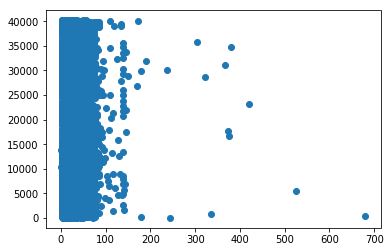

In [111]:
plt.scatter(lengths, range(len(lengths)))
plt.show()

In [112]:
df_test['tokens'] = encoded_test_set

In [113]:
df_test.head()

,hmid,reflection_period,cleaned_hm2,tokens
0,88305,3m,i spent the weekend in chicago with my friends.,"[1, 202, 6, 178, 10, 1936, 12, 2, 50]"
1,88306,3m,we moved back into our house after a remodel. ...,"[23, 419, 102, 155, 56, 114, 45, 3, 5136, 23, ..."
2,88307,3m,my fiance proposed to me in front of my family...,"[2, 685, 1765, 4, 9, 10, 565, 11, 2, 51, 10, 6..."
3,88308,3m,i ate lobster at a fancy restaurant with some ...,"[1, 163, 4656, 20, 3, 1518, 243, 12, 47, 50]"
4,88309,3m,i went out to a nice restaurant on a date with...,"[1, 22, 29, 4, 3, 83, 243, 16, 3, 319, 12, 2, ..."


In [114]:
df_test.drop(['cleaned_hm2'], axis=1, inplace=True)
df_test.head()

,hmid,reflection_period,tokens
0,88305,3m,"[1, 202, 6, 178, 10, 1936, 12, 2, 50]"
1,88306,3m,"[23, 419, 102, 155, 56, 114, 45, 3, 5136, 23, ..."
2,88307,3m,"[2, 685, 1765, 4, 9, 10, 565, 11, 2, 51, 10, 6..."
3,88308,3m,"[1, 163, 4656, 20, 3, 1518, 243, 12, 47, 50]"
4,88309,3m,"[1, 22, 29, 4, 3, 83, 243, 16, 3, 319, 12, 2, ..."


In [115]:
np.mean(lengths)

16.842140601298087

In [116]:
padded_test_set = pad_sequences(encoded_test_set, maxlen=max_length, padding='post')

In [117]:
paddocs_test = []
for doc in padded_test_set:
    paddocs_test.append(list(doc))

In [118]:
df_test['tokens2'] = paddocs_test

In [119]:
lengths = []
for doc in paddocs_test:
    lengths.append(len(doc))

In [120]:
np.mean(lengths)

80.0

In [121]:
df_test.drop(['tokens'], axis=1, inplace=True)

In [124]:
df_test['tokens'] = df_test.tokens2

In [125]:
df_test.drop(['tokens2'], axis=1, inplace=True)
df_test.head()

,hmid,reflection_period,tokens
0,88305,3m,"[1, 202, 6, 178, 10, 1936, 12, 2, 50, 0, 0, 0,..."
1,88306,3m,"[23, 419, 102, 155, 56, 114, 45, 3, 5136, 23, ..."
2,88307,3m,"[2, 685, 1765, 4, 9, 10, 565, 11, 2, 51, 10, 6..."
3,88308,3m,"[1, 163, 4656, 20, 3, 1518, 243, 12, 47, 50, 0..."
4,88309,3m,"[1, 22, 29, 4, 3, 83, 243, 16, 3, 319, 12, 2, ..."


In [126]:
df_test['24h'] = df_test.reflection_period == '24h'
df_test['3m'] = df_test.reflection_period == '3m'
df_test.drop(['reflection_period'], axis=1, inplace=True)
df_test.head()

,hmid,tokens,24h,3m
0,88305,"[1, 202, 6, 178, 10, 1936, 12, 2, 50, 0, 0, 0,...",False,True
1,88306,"[23, 419, 102, 155, 56, 114, 45, 3, 5136, 23, ...",False,True
2,88307,"[2, 685, 1765, 4, 9, 10, 565, 11, 2, 51, 10, 6...",False,True
3,88308,"[1, 163, 4656, 20, 3, 1518, 243, 12, 47, 50, 0...",False,True
4,88309,"[1, 22, 29, 4, 3, 83, 243, 16, 3, 319, 12, 2, ...",False,True


In [127]:
df_test.shape

(40213, 4)

In [128]:
x_test = df_test.tokens

In [129]:
x_test_reshape = x_test.copy()
x_test_reshape.shape

(40213,)

In [131]:
x_test_new = []
for element in x_test_reshape:
    x_test_new.append(np.array(element))

In [132]:
x_test_new = np.array(x_test_new)

In [133]:
x_test_new.shape

(40213, 80)

In [136]:
np.save('D:/Datasets/hackerearth/test_40213_80.npy', arr=x_test_new)

In [137]:
preds = model.predict(x_test_new, batch_size=256)

In [138]:
preds[0]

array([4.4112448e-06, 1.7646511e-05, 3.5189655e-07, 3.1545909e-07,
       4.7070848e-06, 9.9995852e-01, 1.4051553e-05], dtype=float32)

In [139]:
preds.shape

(40213, 7)

In [140]:
categories = []
for pred in preds:
    dummy = np.zeros((7,))
    dummy[np.argmax(pred)] = 1
    categories.append(cats_to_labels[tuple(dummy)])

In [141]:
categories[:5]

['bonding', 'achievement', 'affection', 'bonding', 'affection']

In [143]:
len(categories)

40213

In [146]:
df_predictions = df_test.copy()
df_predictions.drop(['24h', '3m', 'tokens'], axis=1, inplace=True)
df_predictions.head()

,hmid
0,88305
1,88306
2,88307
3,88308
4,88309


In [147]:
df_predictions['predicted_category'] = categories

In [151]:
df_predictions.to_csv('D:/Datasets/hackerearth/submission_word2vec-blstm256-blstm64-d64-e10.csv', index=False)